In [1]:
import sys
sys.path.append('../core/')
sys.path.append('../networks/')
#from vaegan_fc import *
#from vaegan_conv import *
from cvaegan_conv2 import *
from cvaegan3 import CVAEGAN
from misc_ops import *

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
from tensorflow.python.framework import dtypes
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
#from dataset import DataSet
mnist = read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
tf.reset_default_graph()

In [ ]:
# Train
sess = tf.InteractiveSession()
build_encoder = Encoder(256)
build_decoder = Decoder(256)
build_discriminator = Discriminator(512)

model = CVAEGAN(sess, build_encoder, build_decoder, build_discriminator, dataset='mnist',
            batch_size = 100, z_dim = 50, x_dim = 784,
           learning_rate = 1e-4, num_epochs = 5, load=False, lr_decay=1., alpha = 10., beta = 0.0001, gamma=1.,
          checkpoint_name='cvaegan_conv')

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting

In [ ]:
model.train()

Epoch 0 Generator loss: 372.153289795 Discriminator loss: 4.80847549438
Epoch 0 Encoder loss: 37.3024673462 Decoder loss: 15259.3310547 Fake loss: 2.3972992897
Epoch 0 Generator loss: 302.682342529 Discriminator loss: 4.52185344696
Epoch 0 Encoder loss: 30.3549385071 Decoder loss: 15278.7636719 Fake loss: 2.39490032196
Epoch 0 Generator loss: 247.432571411 Discriminator loss: 4.40365314484

1.0


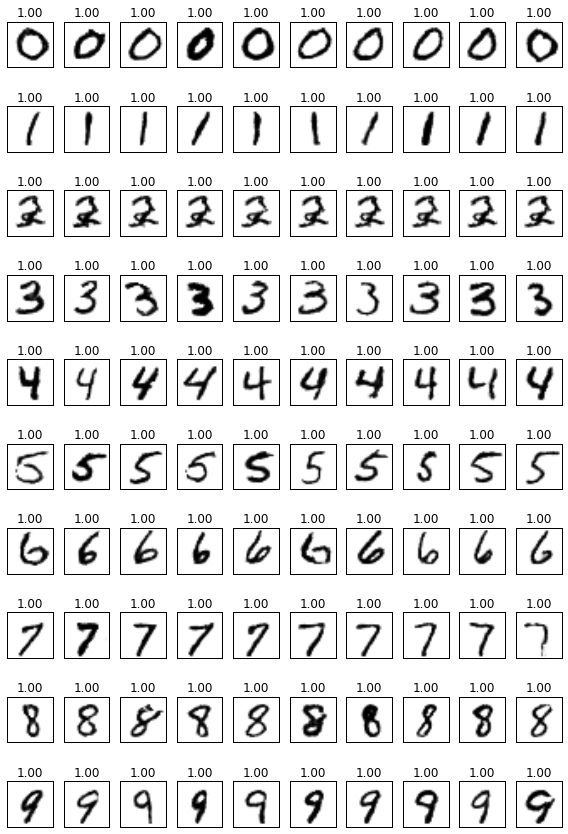

In [4]:
# Load
sess = tf.InteractiveSession()
build_encoder = Encoder(512)
build_decoder = Decoder(512)
build_discriminator = Discriminator(1024)


model = CVAEGAN(sess, build_encoder, build_decoder, build_discriminator, dataset=mnist.train,
        batch_size = 100, z_dim = 50, x_dim = 784,
        learning_rate = 1e-5, num_epochs = 5, load=True, lr_decay=0.95, lr_decay_freq=1000,
        load_file = '../experiments/cvaegan/cvaegan_conv_checkpoint_lr_0.0001_alpha_10.0_beta_0.0001_gamma_100.0-20', 
        checkpoint_name='test'
)
num_examples = 10

info = np.repeat(np.identity(10), num_examples, axis=0)
generated_images = model.generate(num=100, info=info)
gen_dis_real = sess.run(model.dis_real, feed_dict={model.x:generated_images})[:,-1] 
print np.mean(gen_dis_real)
plt.figure(figsize=(8,12))
for i in xrange(10):
    for j in xrange(num_examples):
        plt.subplot(10, num_examples, 10*i+j+1)
        plt.imshow(generated_images[10*i+j,].reshape(28, 28), cmap='gray_r')
        plt.title('{:.2f}'.format(gen_dis_real[10*i+j]))
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
#plt.savefig('images/CVAEGAN_conv_gen_1')
plt.show()

0.785776


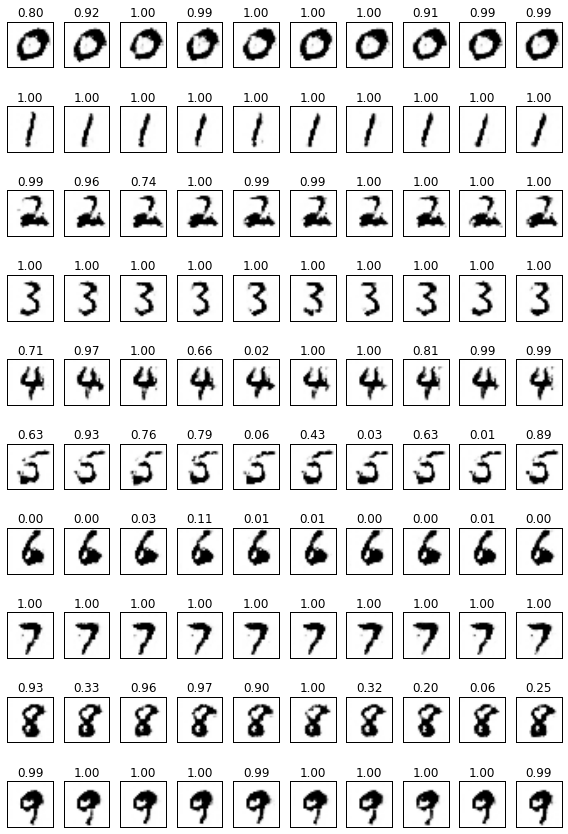

In [4]:
# Load
sess = tf.InteractiveSession()
build_encoder = Encoder(512)
build_decoder = Decoder(512)
build_discriminator = Discriminator(1024)


model = CVAEGAN(sess, build_encoder, build_decoder, build_discriminator, dataset=mnist.train,
        batch_size = 100, z_dim = 50, x_dim = 784,
        learning_rate = 1e-5, num_epochs = 5, load=True, lr_decay=0.95, lr_decay_freq=1000,
        load_file = '../experiments/cvaegan/cvaegan_conv_checkpoint_lr_0.0001_alpha_10.0_beta_0.0001_gamma_100.0-9', 
        checkpoint_name='test'
)
num_examples = 10

info = np.repeat(np.identity(10), num_examples, axis=0)
generated_images = model.generate(num=100, info=info)
gen_dis_real = sess.run(model.dis_real, feed_dict={model.x:generated_images})[:,-1] 
print np.mean(gen_dis_real)
plt.figure(figsize=(8,12))
for i in xrange(10):
    for j in xrange(num_examples):
        plt.subplot(10, num_examples, 10*i+j+1)
        plt.imshow(generated_images[10*i+j,].reshape(28, 28), cmap='gray_r')
        plt.title('{:.2f}'.format(gen_dis_real[10*i+j]))
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
#plt.savefig('images/CVAEGAN_conv_gen_1')
plt.show()

1.0


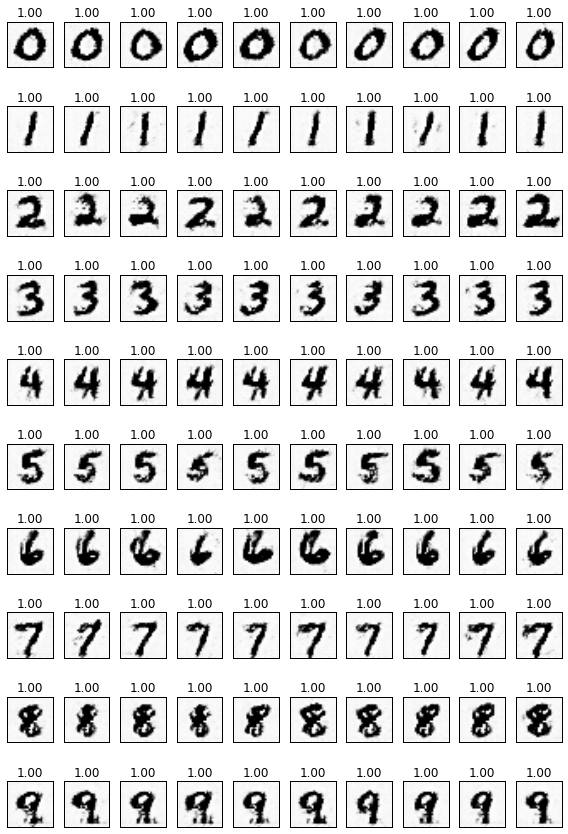

In [4]:
# Load
sess = tf.InteractiveSession()
build_encoder = Encoder(512)
build_decoder = Decoder(512)
build_discriminator = Discriminator(1024)


model = CVAEGAN(sess, build_encoder, build_decoder, build_discriminator, dataset=mnist.train,
        batch_size = 100, z_dim = 50, x_dim = 784,
        learning_rate = 1e-5, num_epochs = 5, load=True, lr_decay=0.95, lr_decay_freq=1000,
        load_file = '../experiments/cvaegan/cvaegan_conv_checkpoint_lr_0.0001_alpha_10.0_beta_0.001_gamma_100.0-5', 
        checkpoint_name='test'
)
num_examples = 10

info = np.repeat(np.identity(10), num_examples, axis=0)
generated_images = model.generate(num=100, info=info)
gen_dis_real = sess.run(model.dis_real, feed_dict={model.x:generated_images})[:,-1] 
print np.mean(gen_dis_real)
plt.figure(figsize=(8,12))
for i in xrange(10):
    for j in xrange(num_examples):
        plt.subplot(10, num_examples, 10*i+j+1)
        plt.imshow(generated_images[10*i+j,].reshape(28, 28), cmap='gray_r')
        plt.title('{:.2f}'.format(gen_dis_real[10*i+j]))
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
#plt.savefig('images/CVAEGAN_conv_gen_1')
plt.show()